In [ ]:
!pip install pystan==2.19.1.1
!pip install fbprophet

In [ ]:
import pandas as pd
from prophet.plot import plot_plotly, plot_components_plotly
from fbprophet import Prophet

In [ ]:
df = pd.read_csv('/content/AAPL.csv')

In [ ]:
df.head

In [ ]:
df = df[['Date', 'Close']]

In [ ]:
df.head

<bound method NDFrame.head of              ds           y
0    2021-09-14  148.119995
1    2021-09-15  149.029999
2    2021-09-16  148.789993
3    2021-09-17  146.059998
4    2021-09-20  142.940002
..          ...         ...
247  2022-09-07  155.960007
248  2022-09-08  154.460007
249  2022-09-09  157.369995
250  2022-09-12  163.429993
251  2022-09-13  153.839996

[252 rows x 2 columns]>

In [ ]:
df= df.rename(columns={'Date':'ds', 'Close':'y'})

In [ ]:
df.head

In [ ]:
m = Prophet(interval_width=0.95,daily_seasonality=True)
model = m.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [ ]:
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

In [ ]:
from fbprophet.plot import plot_plotly, plot_components_plotly

In [ ]:
plot_plotly(m,forecast)

Comparing the actual vs predicted

In [ ]:
df[df.ds=='2022-09-12']['y']

250    163.429993
Name: y, dtype: float64

In [ ]:
forecast[forecast.ds=='2022-09-12']['yhat']

250    168.228603
Name: yhat, dtype: float64

In [ ]:
forecast.head

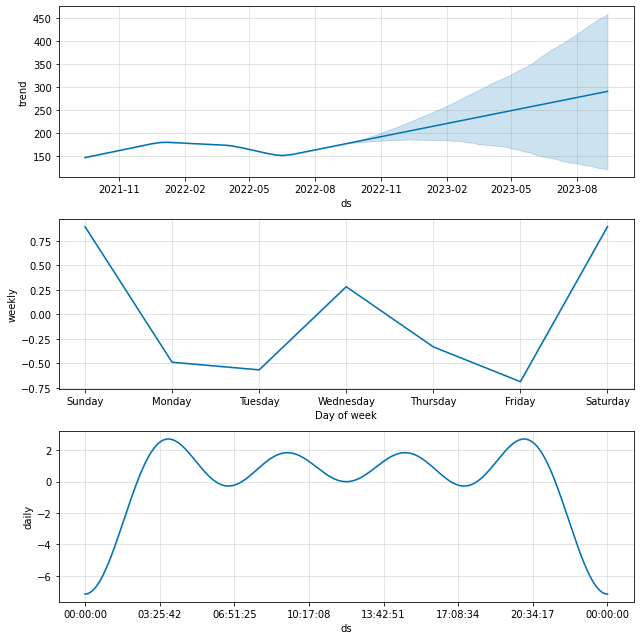

In [ ]:
plot1 = m.plot_components(forecast)